In [13]:
import ecco
import japanize_matplotlib

In [3]:
# https://speakerdeck.com/hikomimo/ecconiyoruyan-yu-moderufalseke-shi-hua-2022-01-28-nlp-hacks-number-1?slide=6
# https://ecco.readthedocs.io/en/main/api/ecco/
# https://github.com/jalammar/ecco/blob/0ef61c51b76c48cd8c21c7807c20510565f307de/src/ecco/model-config.yaml

def ecco_gen(text, model='rinna/japanese-gpt-1b', generate=30):
    model_config = {
        'embedding': "transformer.wte.weight",
        'type': 'causal',
        'activations': ['mlp\.c_proj'],
        "token_prefix": "_",
        "partial_token_prefix": "",
    }
    lm = ecco.from_pretrained(model, model_config=model_config)
    output = lm.generate(text, generate=generate, do_sample=True)
    return output

In [4]:
(output := ecco_gen("吾輩は猫である。名前は", model="rinna/japanese-gpt2-xsmall", generate=100))

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
output.layer_predictions(position=19)

<IPython.core.display.Javascript object>

In [11]:
output.layer_predictions(position=19, layer=5)

<IPython.core.display.Javascript object>

/root/.cache/pypoetry/virtualenvs/gpt-ecco-sandbox-9TtSrW0h-py3.9/lib/python3.9/site-packages/ecco/output.py:469: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_id = torch.tensor(self.token_ids[0][offset + j])
/root/.cache/pypoetry/virtualenvs/gpt-ecco-sandbox-9TtSrW0h-py3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9601 (\N{LOWER ONE EIGHTH BLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
posx and posy should be finite values


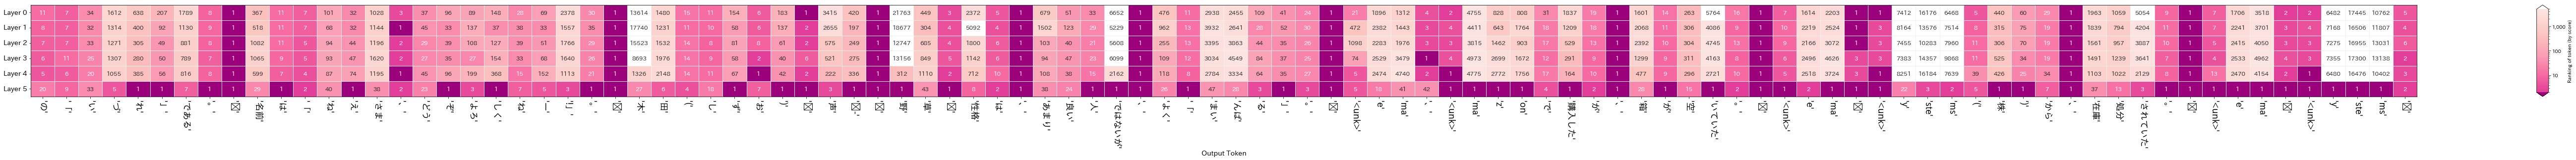

In [14]:
output.rankings()

posx and posy should be finite values


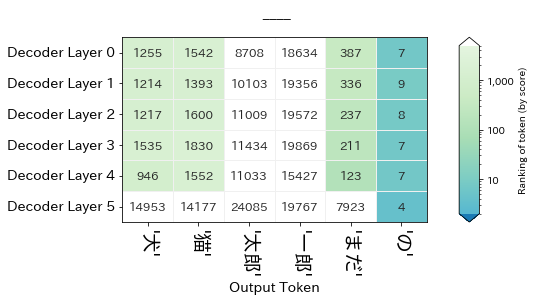

In [19]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("rinna/japanese-gpt2-xsmall")

output.rankings_watch(
    [
        tokenizer.vocab["犬"],
        tokenizer.vocab["猫"],
        tokenizer.vocab["太郎"],
        tokenizer.vocab["一郎"],
        tokenizer.vocab["まだ"],
        tokenizer.vocab["の"],
    ]
)